# 6.2 Exploring relationships

### This script contains the following:
#### 01. Importing Visualization Libraries and Data
#### 02. Correlations
#### 03. Scatterplots
#### 04. Pair Plot
#### 05. Categorical Plot
#### 06. Questions
#### 07. Hypotheses

# 01. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#Define path
path = r'C:\Users\Josh Abrams\Desktop\CF_CAPSTONE'

In [3]:
df_king = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'King Data Clean.csv'))


# 02 Data Cleaning


In [4]:
df_king.head()

,Unnamed: 0.1,Unnamed: 0,id,date,sale_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_basement,yr_built,yr_renovated,zipcode,city,State,lat,long,sqft_living15,sqft_lot15
0,0,0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,...,0,1955,0,32642,Seattle,WA,47.5112,-122.257,1340,5650
1,1,1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,...,400,1951,1991,32589,Seattle,WA,47.7210,-122.319,1690,7639
2,2,2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,...,0,1933,0,32492,Kenmore,WA,47.7379,-122.233,2720,8062
3,3,3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,...,910,1965,0,32600,Seattle,WA,47.5208,-122.393,1360,5000
4,4,4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,...,0,1987,0,32538,Sammamish,WA,47.6168,-122.045,1800,7503


In [5]:
df_king.shape

(21613, 25)

In [6]:
df_king.describe()

,Unnamed: 0.1,Unnamed: 0,id,sale_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,10806.00000,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,32541.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,6239.28002,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,0.00000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,32465.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,32497.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,32529.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,32582.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,32663.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df_king.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.1   21613 non-null  int64  
 1   Unnamed: 0     21613 non-null  int64  
 2   id             21613 non-null  int64  
 3   date           21613 non-null  object 
 4   sale_price     21613 non-null  int64  
 5   bedrooms       21613 non-null  int64  
 6   bathrooms      21613 non-null  float64
 7   sqft_living    21613 non-null  int64  
 8   sqft_lot       21613 non-null  int64  
 9   floors         21613 non-null  float64
 10  waterfront     21613 non-null  int64  
 11  view           21613 non-null  int64  
 12  condition      21613 non-null  int64  
 13  grade          21613 non-null  int64  
 14  sqft_above     21613 non-null  int64  
 15  sqft_basement  21613 non-null  int64  
 16  yr_built       21613 non-null  int64  
 17  yr_renovated   21613 non-null  int64  
 18  zipcod

In [8]:
## Reducing data types to save RAM before merge
df_king['bedrooms'] = df_king['bedrooms'].astype('int8')
df_king['bathrooms'] = df_king['bathrooms'].astype('float16')
df_king['floors'] = df_king['floors'].astype('float16')
df_king['waterfront'] = df_king['waterfront'].astype('object')
df_king['view'] = df_king['view'].astype('object')
df_king['condition'] = df_king['condition'].astype('object')
df_king['grade'] = df_king['grade'].astype('object')
df_king['zipcode'] = df_king['zipcode'].astype('int')

In [9]:
df_king.head()

,Unnamed: 0.1,Unnamed: 0,id,date,sale_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_basement,yr_built,yr_renovated,zipcode,city,State,lat,long,sqft_living15,sqft_lot15
0,0,0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,...,0,1955,0,32642,Seattle,WA,47.5112,-122.257,1340,5650
1,1,1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,...,400,1951,1991,32589,Seattle,WA,47.7210,-122.319,1690,7639
2,2,2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,...,0,1933,0,32492,Kenmore,WA,47.7379,-122.233,2720,8062
3,3,3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,...,910,1965,0,32600,Seattle,WA,47.5208,-122.393,1360,5000
4,4,4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,...,0,1987,0,32538,Sammamish,WA,47.6168,-122.045,1800,7503


# 03. Correlations

In [10]:
df_king.corr()

,Unnamed: 0.1,Unnamed: 0,id,sale_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Unnamed: 0.1,1.000000,1.000000,0.006718,0.027372,0.010794,0.107334,0.044717,-0.026877,0.179138,0.071958,-0.041841,0.199549,-0.025601,-0.002199,0.000701,0.008649,0.026647,-0.029827
Unnamed: 0,1.000000,1.000000,0.006718,0.027372,0.010794,0.107334,0.044717,-0.026877,0.179138,0.071958,-0.041841,0.199549,-0.025601,-0.002199,0.000701,0.008649,0.026647,-0.029827
id,0.006718,0.006718,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
sale_price,0.027372,0.027372,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.010794,0.010794,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.107334,0.107334,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.044717,0.044717,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.026877,-0.026877,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.179138,0.179138,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
sqft_above,0.071958,0.071958,-0.010842,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050


In [11]:
# Create a subset excluding the "Date" and "No" columns

sub_king = df_king[['date','sale_price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors','sqft_above','sqft_basement', 'waterfront', 'view','condition','grade','yr_built','yr_renovated','zipcode','city','lat','long','sqft_living15','sqft_lot15']]

In [12]:
sub_king

,date,sale_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,waterfront,...,condition,grade,yr_built,yr_renovated,zipcode,city,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900,3,1.00,1180,5650,1.0,1180,0,0,...,3,7,1955,0,32642,Seattle,47.5112,-122.257,1340,5650
1,12/9/2014,538000,3,2.25,2570,7242,2.0,2170,400,0,...,3,7,1951,1991,32589,Seattle,47.7210,-122.319,1690,7639
2,2/25/2015,180000,2,1.00,770,10000,1.0,770,0,0,...,3,6,1933,0,32492,Kenmore,47.7379,-122.233,2720,8062
3,12/9/2014,604000,4,3.00,1960,5000,1.0,1050,910,0,...,5,7,1965,0,32600,Seattle,47.5208,-122.393,1360,5000
4,2/18/2015,510000,3,2.00,1680,8080,1.0,1680,0,0,...,3,8,1987,0,32538,Sammamish,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,5/21/2014,360000,3,2.50,1530,1131,3.0,1530,0,0,...,3,8,2009,0,32567,Seattle,47.6993,-122.346,1530,1509
21609,2/23/2015,400000,4,2.50,2310,5813,2.0,2310,0,0,...,3,8,2014,0,32610,Seattle,47.5107,-122.362,1830,7200
21610,6/23/2014,402101,2,0.75,1020,1350,2.0,1020,0,0,...,3,7,2009,0,32608,Seattle,47.5944,-122.299,1020,2007
21611,1/16/2015,400000,3,2.50,1600,2388,2.0,1600,0,0,...,3,8,2004,0,32491,Issaquah,47.5345,-122.069,1410,1287


In [13]:
sub_king.corr()

,sale_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
sale_price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050
sqft_basement,0.323816,0.303093,0.283770,0.435043,0.015286,-0.245705,-0.051943,1.000000,-0.133124,0.071323,0.074845,0.110538,-0.144765,0.200355,0.017276
yr_built,0.054012,0.154178,0.506019,0.318049,0.053080,0.489319,0.423898,-0.133124,1.000000,-0.224874,-0.346869,-0.148122,0.409356,0.326229,0.070958
yr_renovated,0.126434,0.018841,0.050739,0.055363,0.007644,0.006338,0.023285,0.071323,-0.224874,1.000000,0.064357,0.029398,-0.068372,-0.002673,0.007854


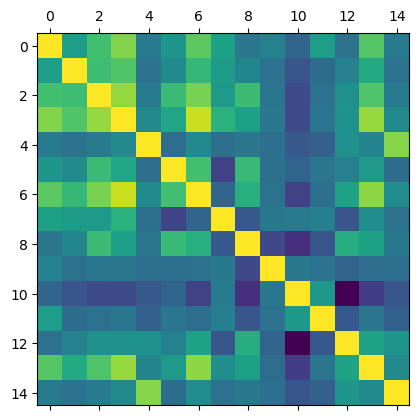

In [14]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub_king.corr())
plt.show()

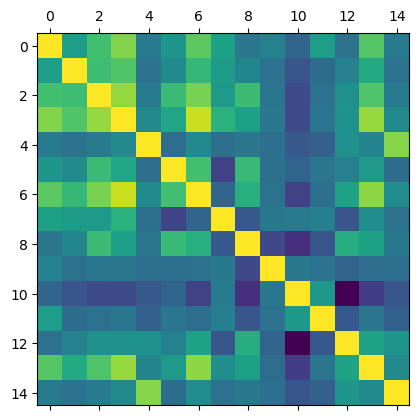

In [15]:
# Save figure
plt.matshow(sub_king.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

In [16]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\Josh Abrams\\Desktop\\CF_CAPSTONE\\Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

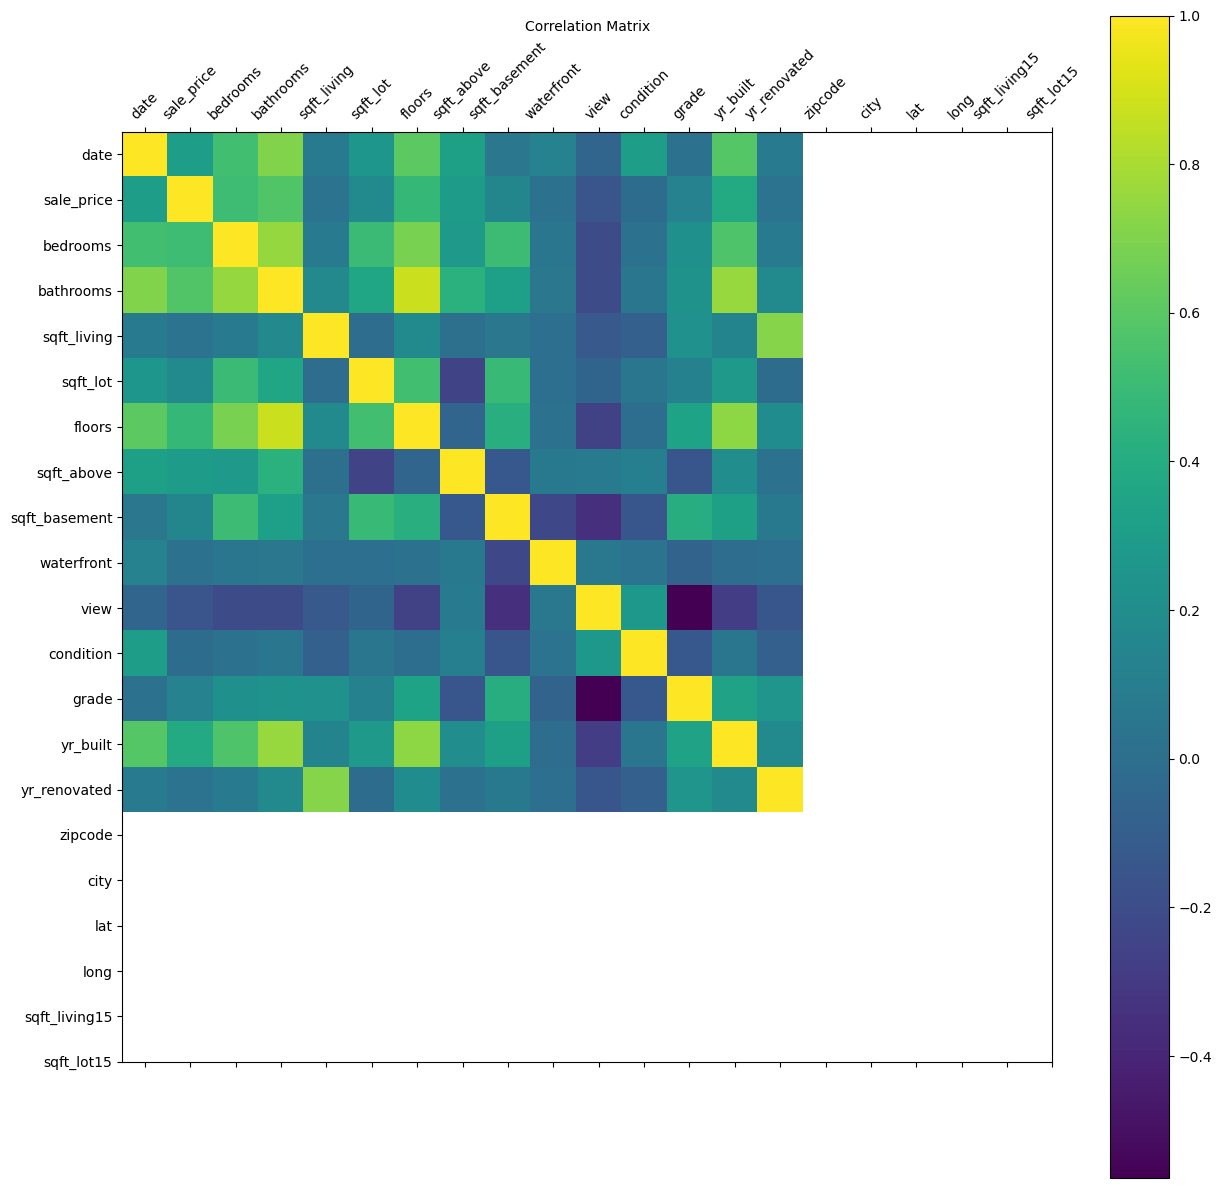

In [17]:
f = plt.figure(figsize=(15, 15)) # figure size 
plt.matshow(sub_king.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub_king.shape[1]), sub_king.columns, fontsize=10, rotation=45) # x axis labels
plt.yticks(range(sub_king.shape[1]), sub_king.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=10) # add font size
plt.title('Correlation Matrix', fontsize=10) # add title

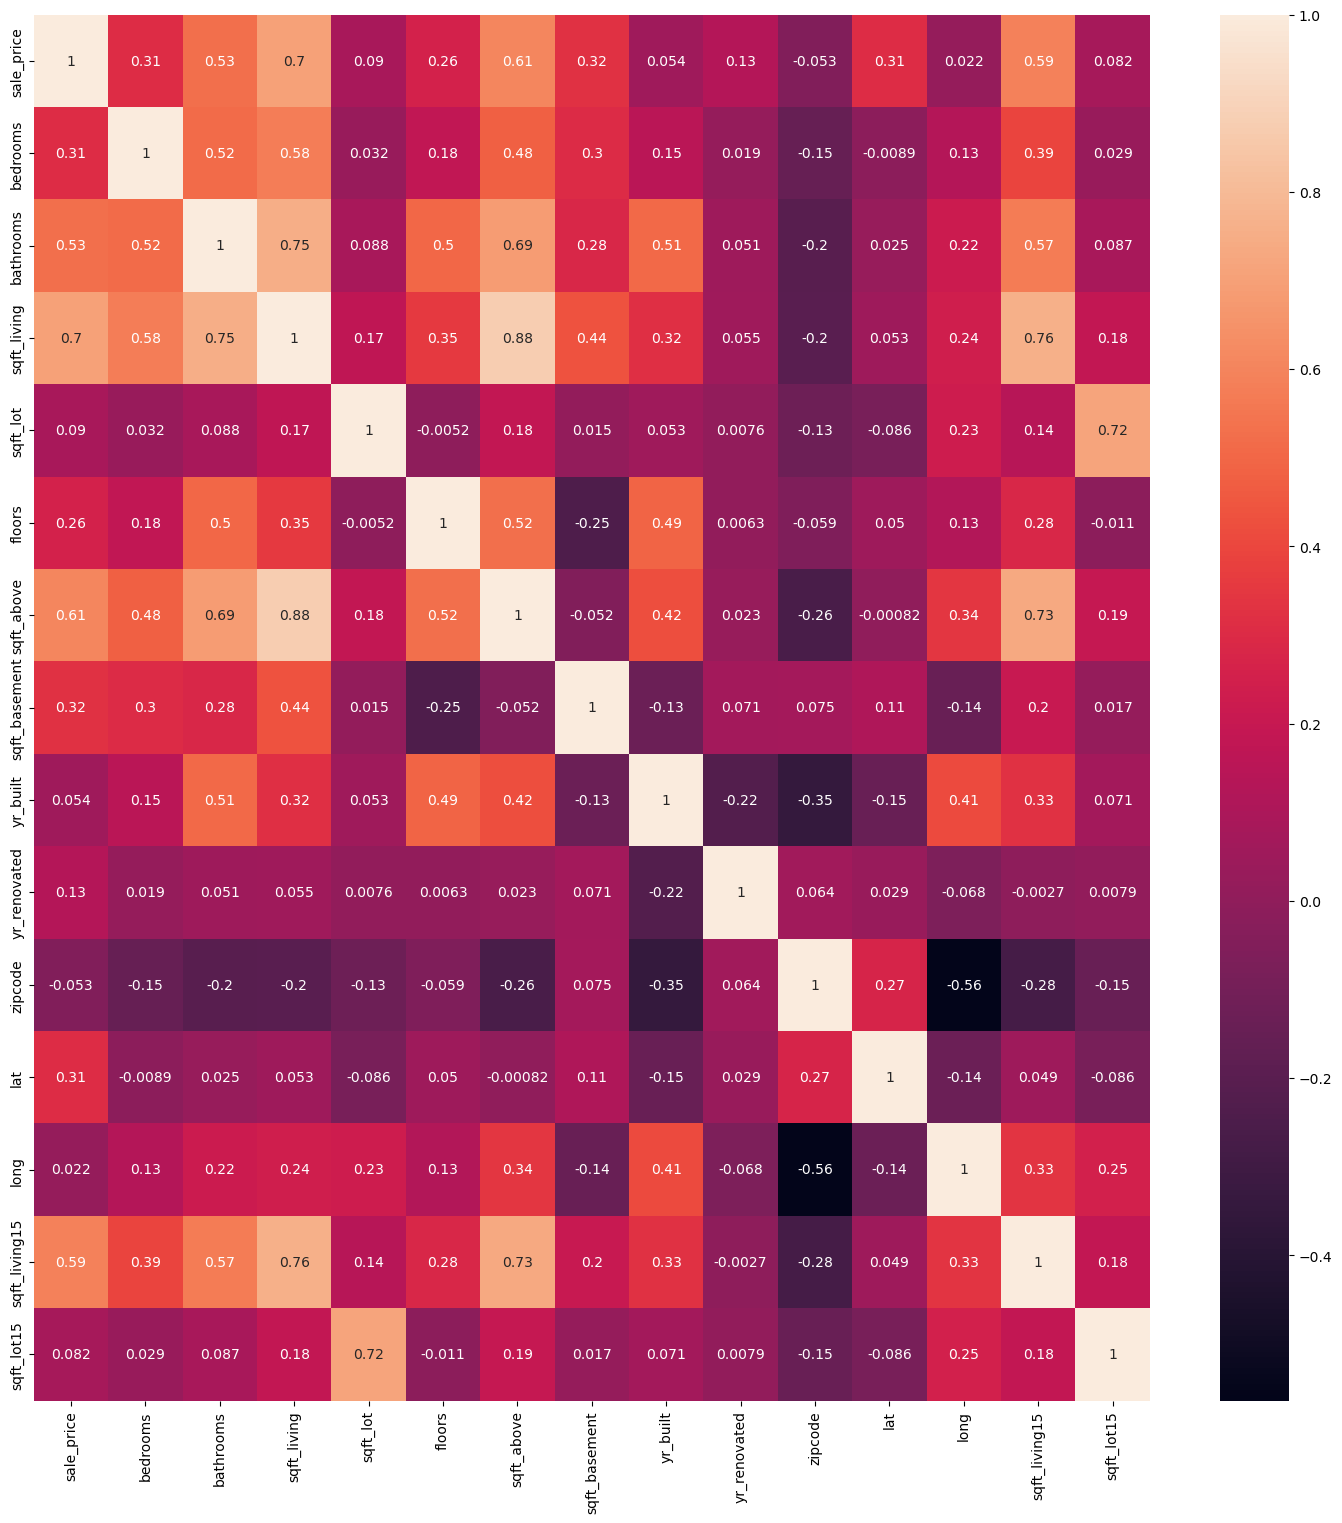

In [18]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(18,18))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub_king.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [1]:
# Export Corrrelation plot


## The strongest positive correlation is between sqft living and sqft above which makes sense however this is not very meaningful, when viewed with the correlation between sqft_living and sales price it has more context.
## The negative correlation that is the most meaningful here is between zipcode and sales price meaning that zipcode doesnt neccesarily have a large effect on sales price.
## It is also important to note that yr_built and sale_price have a reasonably strong correlation..

## Scatterplots

In [19]:
# Creating a random sample of sub dataframe to use for scatterplot
np.random.seed()
dev = np.random.rand(len(sub_king)) <= .95
big = sub_king[dev]
small = sub_king[~dev]

In [20]:
# Checking size of small sample dataframe 
len(small)

1050

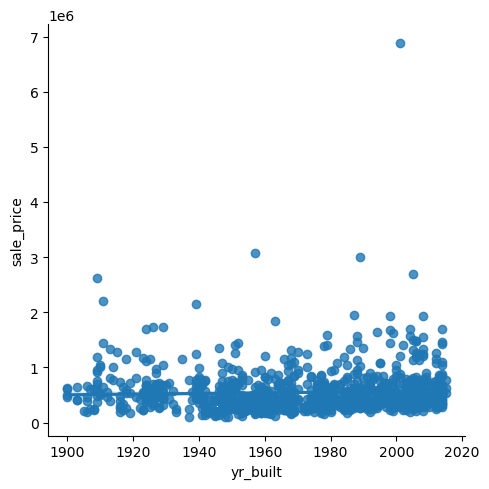

In [21]:
# Create a scatterplot for the "year built" and "sale_price" columns in seaborn

sns.lmplot(x = 'yr_built', y = 'sale_price', data = small)

In [ ]:
# Export Scatterplots


## We can see there is not a ton of correlation between sale price and year built but as houses are newer they have increased sales outlier even though this data seems to be relatively stable

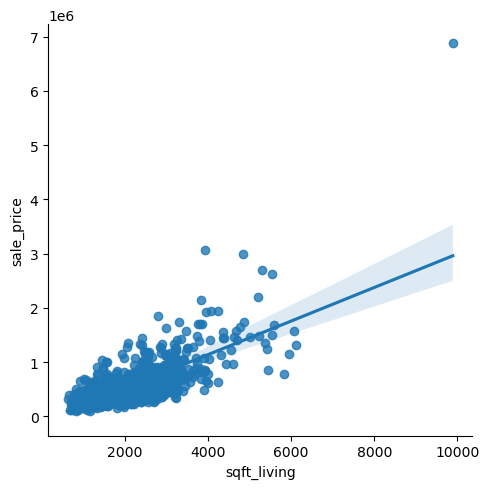

In [22]:
# Create a scatterplot for the "sqft_living" and "sale_price" columns in seaborn

sns.lmplot(x = 'sqft_living', y = 'sale_price', data = small)

In [ ]:
# Export Scatterplots


## There is a strong postiive correlation\between the size of a properties living area and the sale price

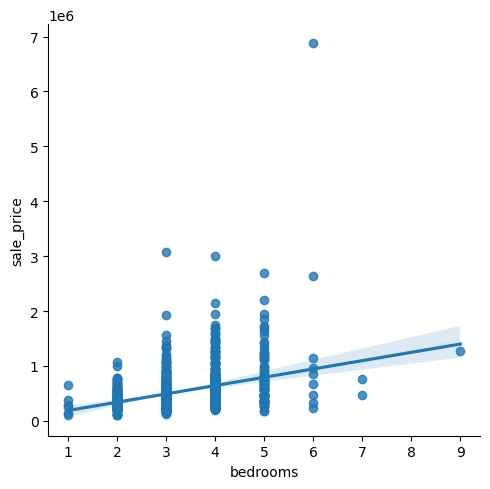

In [23]:
# Create a scatterplot for the "bedrooms" and "sale_price" columns in seaborn

sns.lmplot(x = 'bedrooms', y = 'sale_price', data = small)

## The sale price for 3-5 bedrooms is relatively stable with 4 and 5 bedrooms commanding the highest prices. There is a positive correlation vetween bedrooms and sales price

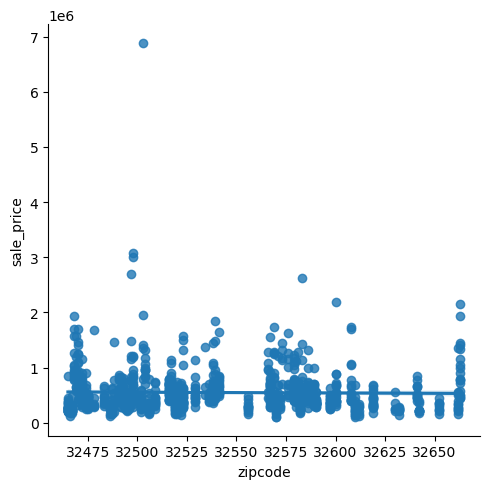

In [24]:
# Create a scatterplot for the "sqft_living" and "sale_price" columns in seaborn

sns.lmplot(x = 'zipcode', y = 'sale_price', data = small)

## Certain zipcodes have both higher sales and higher sales prices but no real correlation


## Pair Plots

In [54]:
# Keep only the variables you want to use in the pair plot

sub_king_2 = sub_king[['yr_built', 'sale_price', 'sqft_living', 'grade']]

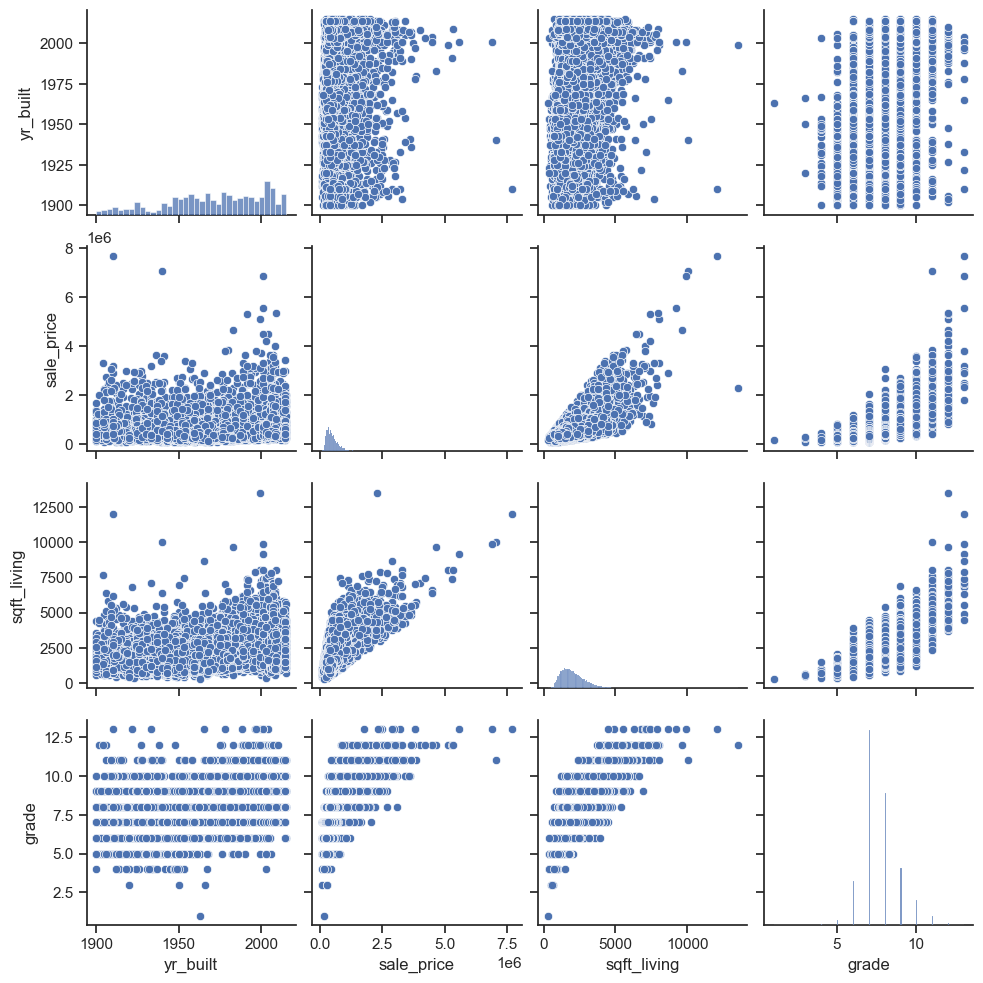

In [55]:
# Create a pair plot 

g = sns.pairplot(sub_king_2)

## As we can see there is a correlation between certain attributes for example year built and sale price in addition to yr_built and sqft living.There are also some correlation between grade and these metrics

## Categorical Plot

##### Creating a categorical variable that splits the "sale_price" column into categories

<AxesSubplot:xlabel='sale_price', ylabel='Count'>

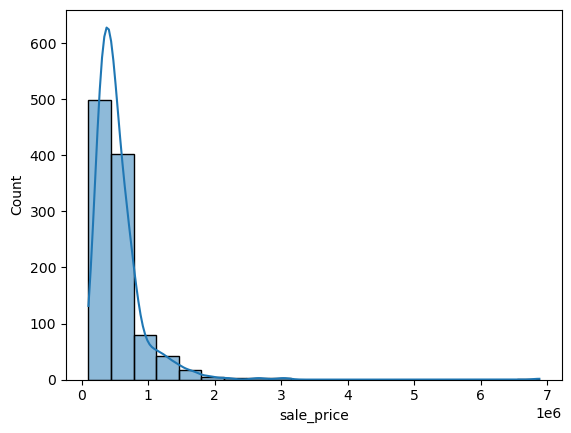

In [27]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(small['sale_price'], bins = 20, kde = True)

In [ ]:
# Export Categorical Plot


In [28]:
df_king.loc[df_king['sale_price'] <= 321725, 'Price category'] = 'Low price'

In [29]:
df_king.loc[(df_king['sale_price'] >= 321725) & (df_king['sale_price'] < 645000), 'Price category'] = 'Middle price'

In [30]:
df_king.loc[df_king['sale_price'] >= 645000, 'Price category'] = 'High price'

In [31]:
df_king['Price category'].value_counts(dropna = False)

Middle price    10797
High price       5413
Low price        5403
Name: Price category, dtype: int64

<AxesSubplot:xlabel='city', ylabel='Count'>

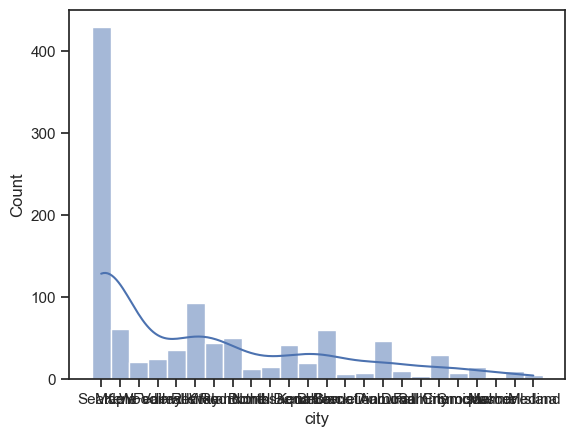

In [36]:
sns.histplot(small['city'], bins = 20, kde = True)

## Seattle in particular has the most sales per city, which may be useful for buying properties. In further analysis you could limit this to top ten cities

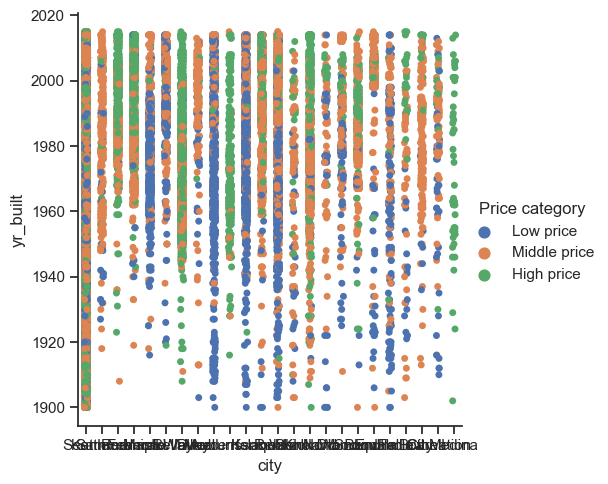

In [38]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
cat_plot = sns.catplot(x="city", y="yr_built", hue="Price category", data=df_king) 

In [2]:
#Export Categorical Plot


# Seattle has the highest volume of sales across all years in addition the most middle priced houses, other citities have some higher price properties but less sales. In further analysis you could limit this to top ten cities

## Questions

Can we predict the price of a house in different regions?
-I think this will be challenging but if we were to layer in demographic information we can make some informed decisions on housing prices and volume of sales.
Can we estimate the popularity of an area based on prior house sales?
-If we look at the most recent years we can see where the most purchases have happened.
What can we learn about different regions from the data what is undervalued and overvalued?
-We can check if there is a large divide between the houses being sold in regards to variables.

## Hypothesis

## The sale price of a house increases as its sq_footage and the recency of the construction, with some limited outliers for older mansion style houses based off variables